## Objectives

After completing this lab you will be able to:

-   Create Data Visualization with Python
-   Use various Python libraries for visualization
-   Create additional labs namely area plots, histogram and bar charts
-   Create pie charts, box plots, scatter plots and bubble charts
-   Create Word cloud and Waffle charts
-   Create regression plots with Seaborn library




## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">here</a>.

* * *


The first thing we'll do is import two key data analysis modules: _pandas_ and **Numpy**.


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using _pandas_ `read_excel()` method. Normally, before we can do that, we would need to download a module which _pandas_ requires to read in excel files. This module is **xlrd**. For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **xlrd** module:

```
!conda install -c anaconda xlrd --yes
```


Now we are ready to read in our data.


In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.


In [3]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.


In [4]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

This method can be used to get a short summary of the dataframe.


In [5]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


To get the list of column headers we can call upon the dataframe's `.columns` parameter.


In [6]:
df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.


In [7]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Note: The default type of index and columns is NOT list.


In [8]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To get the index and columns as lists, we can use the `tolist()` method.


In [9]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To view the dimensions of the dataframe, we use the `.shape` parameter.


In [10]:
# size of dataframe (rows, columns)
df_can.shape    

(195, 43)

Note: The main types stored in _pandas_ objects are _float_, _int_, _bool_, _datetime64[ns]_ and _datetime64[ns, tz] (in >= 0.17.0)_, _timedelta[ns]_, _category (in >= 0.15.0)_, and _object_ (string). In addition these dtypes have item sizes, e.g. int64 and int32. 


Let's clean the data set to remove a few unnecessary columns. We can use _pandas_ `drop()` method as follows:


In [11]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:


In [12]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:


In [14]:
# Convert all columns from 1980 to 2013 to numeric, replacing non-numeric values with NaN
df_can.iloc[:, 4:] = df_can.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

# Sum the numeric columns and create a 'Total' column
df_can['Total'] = df_can.iloc[:, 4:].sum(axis=1)

We can check to see how many null objects we have in the dataset as follows:


In [15]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.


In [16]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


* * *

## _pandas_ Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column

**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

```python
    df.column_name 
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python
    df[['column 1', 'column 2']] 
        (returns dataframe)
```

* * *


Example: Let's try filtering on the list of countries ('Country').


In [17]:
df_can.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Let's try filtering on the list of countries ('OdName') and the data for years: 1980 - 1985.


In [18]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


### Select Row

There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```


Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.


In [19]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [20]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [21]:
# optional: to remove the name of the index
df_can.index.name = None

Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:

```
1. The full row data (all columns)
2. For year 2013
3. For years 1980 to 1985
```


In [22]:
# 1. the full row data (all columns)
print(df_can.loc['Japan'])

# alternate methods
print(df_can.iloc[87])
print(df_can[df_can.index == 'Japan'].T.squeeze())

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [23]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982
982


In [24]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. 

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.


In [25]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [26]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector. 

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).


In [27]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


Before we proceed: let's review the changes we have made to our dataframe.


In [28]:
# 2. pass this condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [29]:
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [30]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


* * *

# Visualizing Data using Matplotlib<a id="8"></a>


## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).  As mentioned on their website: 

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.


### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer. 


Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:


In [31]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

*optional: check if Matplotlib is loaded.


In [32]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.2


*optional: apply a style to Matplotlib.


In [33]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Plotting in _pandas_

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in _pandas_ is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:

-   [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
-   [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


# Line Pots (Series/Dataframe) <a id="12"></a>


**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.


In [34]:
haiti = df_can.loc['Iraq', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    262
1981    245
1982    260
1983    380
1984    428
Name: Iraq, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.


<Axes: >

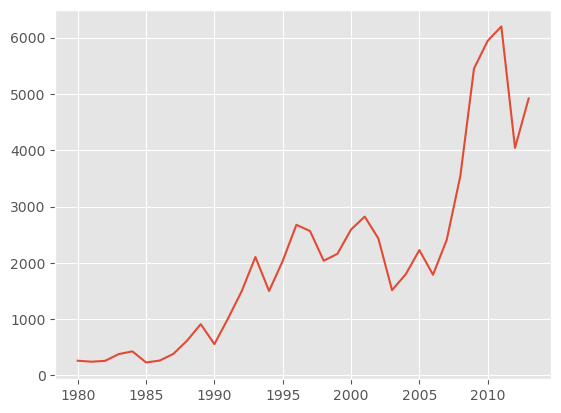

In [35]:
haiti.plot()

_pandas_ automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type _string_. Therefore, let's change the type of the index values to _integer_ for plotting.

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


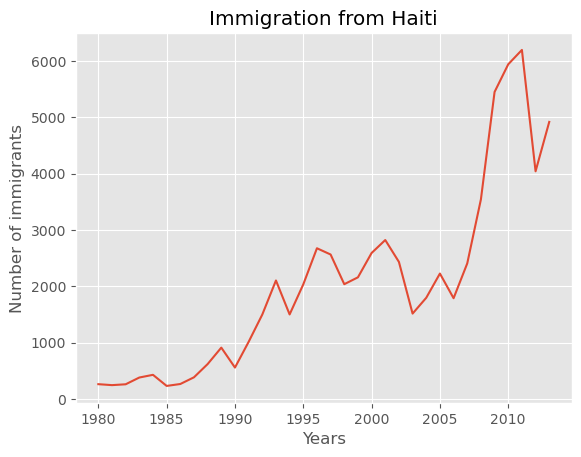

In [36]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.


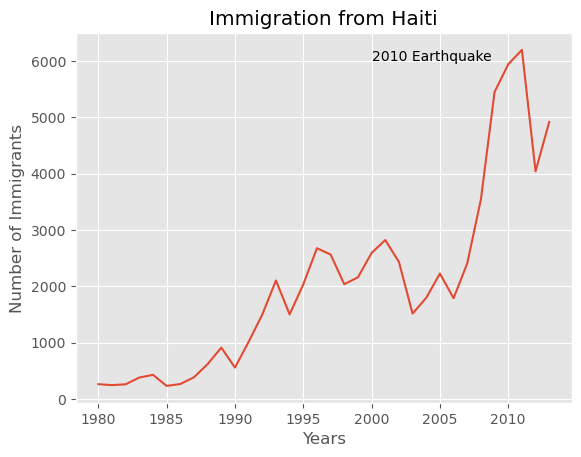

In [37]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:

```
 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
```

```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```

```
If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```

```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```

```
We will cover advanced annotation methods in later modules.
```


We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.


In [38]:
### type your answer here
df_CI=df_can.loc[['China','India'],years]
df_CI.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI = df_can.loc[['India', 'China'], years]
    df_CI.head()
```

</details>


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.


<Axes: >

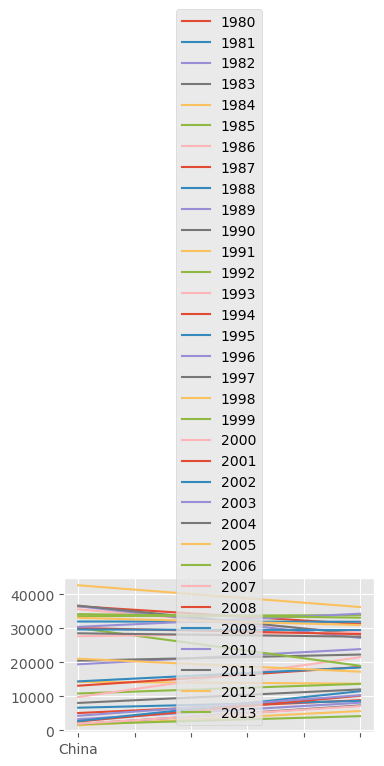

In [41]:
### type your answer here
fig, ax = plt.subplots(figsize=(4, 2))  # Adjust the width and height as needed
df_CI.plot(kind='line', ax=ax)


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.plot(kind='line')
```

</details>


That doesn't look right...

Recall that _pandas_ plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.


In [42]:
df_CI = df_CI.transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


_pandas_ will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.


<Axes: >

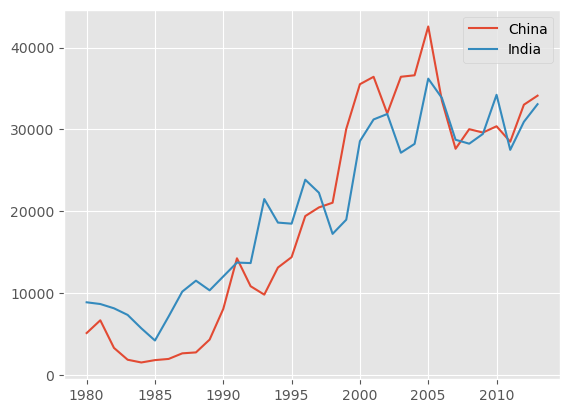

In [43]:
### type your answer here
df_CI.plot(kind='line')




<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
    df_CI.plot(kind='line')

    plt.title('Immigrants from China and India')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()
```

</details>


<br>From the above plot, we can observe that the China and India have very similar immigration trends through the years. 


_Note_: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below. 

```python
print(type(haiti))
print(haiti.head(5))
```

> class 'pandas.core.series.Series' <br>
> 1980    1666 <br>
> 1981    3692 <br>
> 1982    3498 <br>
> 1983    2860 <br>
> 1984    1418 <br>
> Name: Haiti, dtype: int64 <br>


Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.


# Area Plots<a id="6"></a>


In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.


In [44]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False`. 


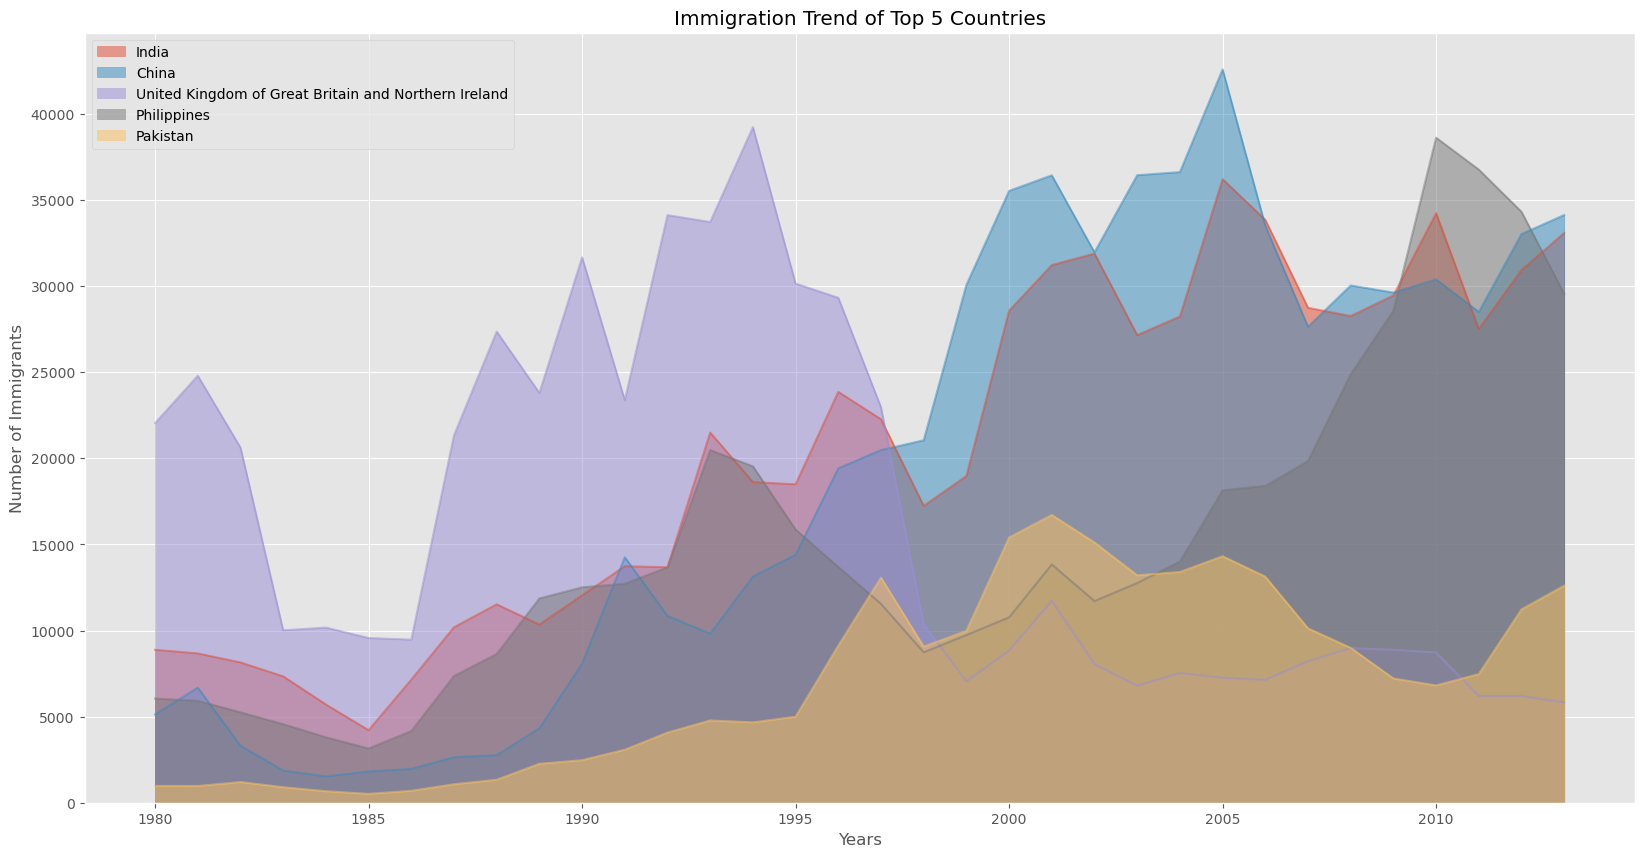

In [45]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.


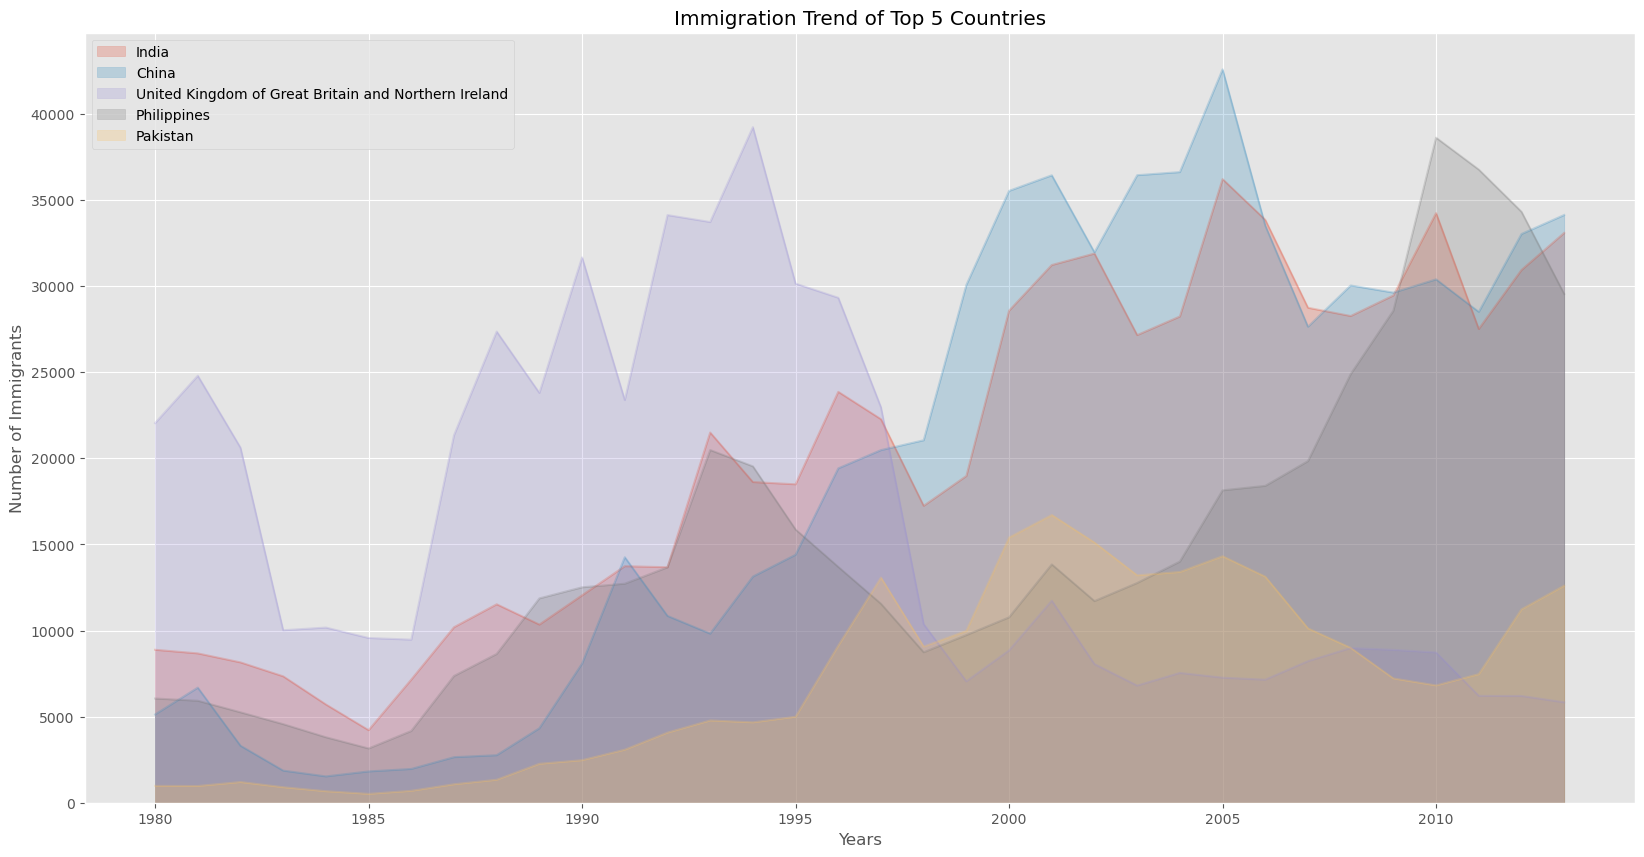

In [46]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of ploting with `matplotlib`. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) **

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "_set__" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis. 

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later). 

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.


Text(0.5, 0, 'Years')

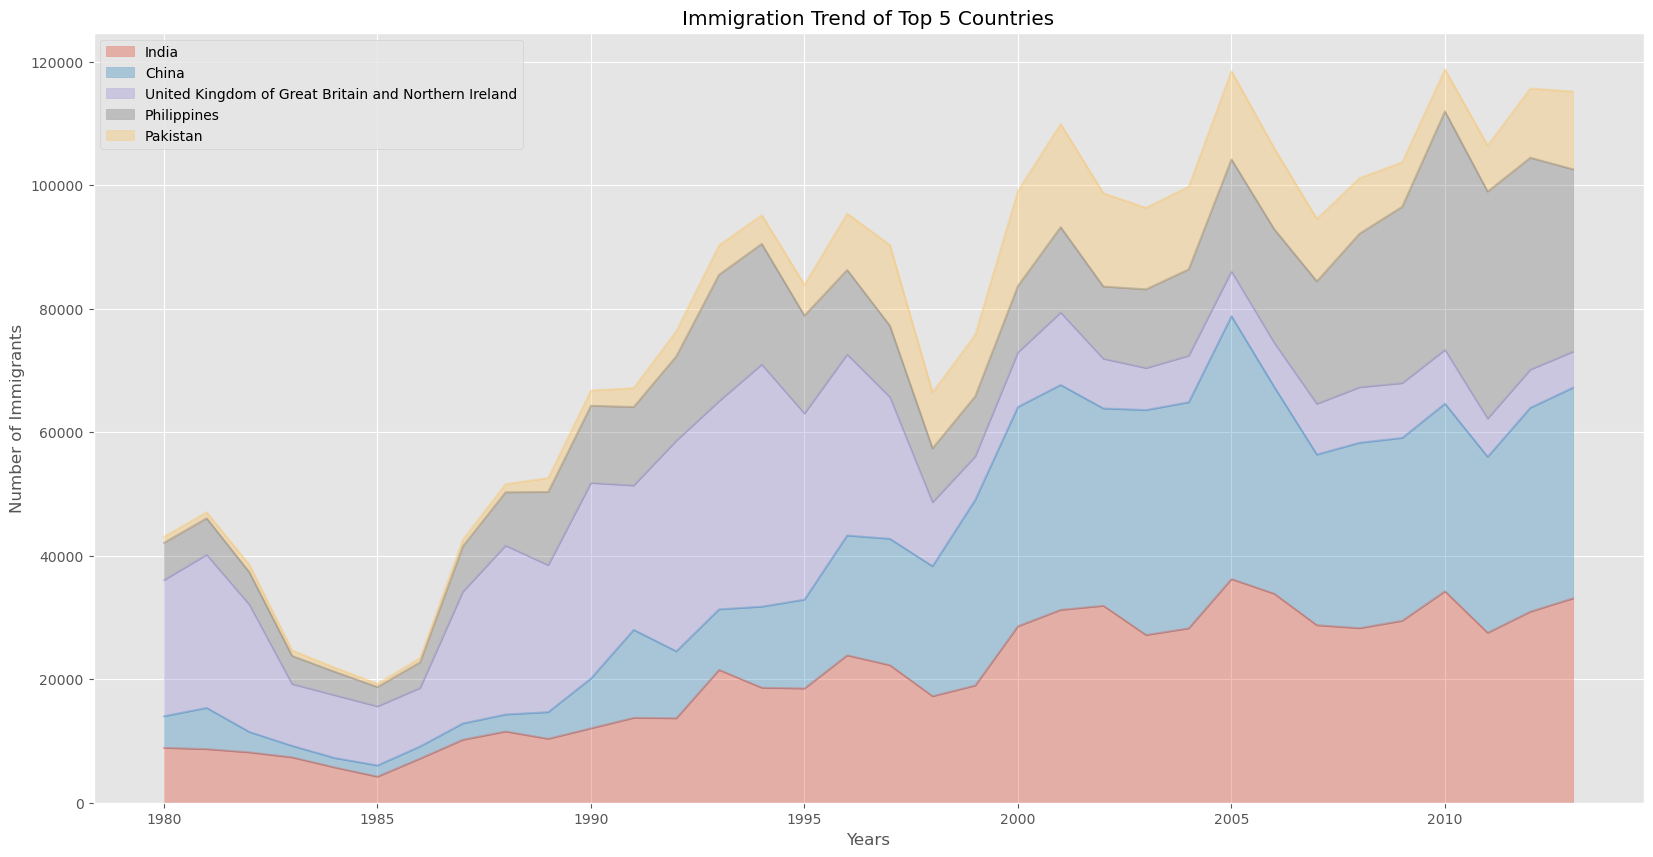

In [47]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.45.


<Axes: >

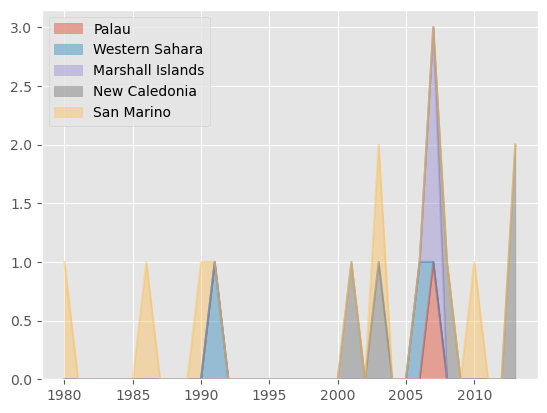

In [48]:
### type your answer here

df_least5=df_can.sort_values(['Total'], ascending=True, axis=0)
df_least5=df_least5[years]
df_least5=df_least5.iloc[0:5,:]
df_least5=df_least5.transpose()
df_least5.head()
df_least5.plot(kind='area',alpha=0.45)


**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.


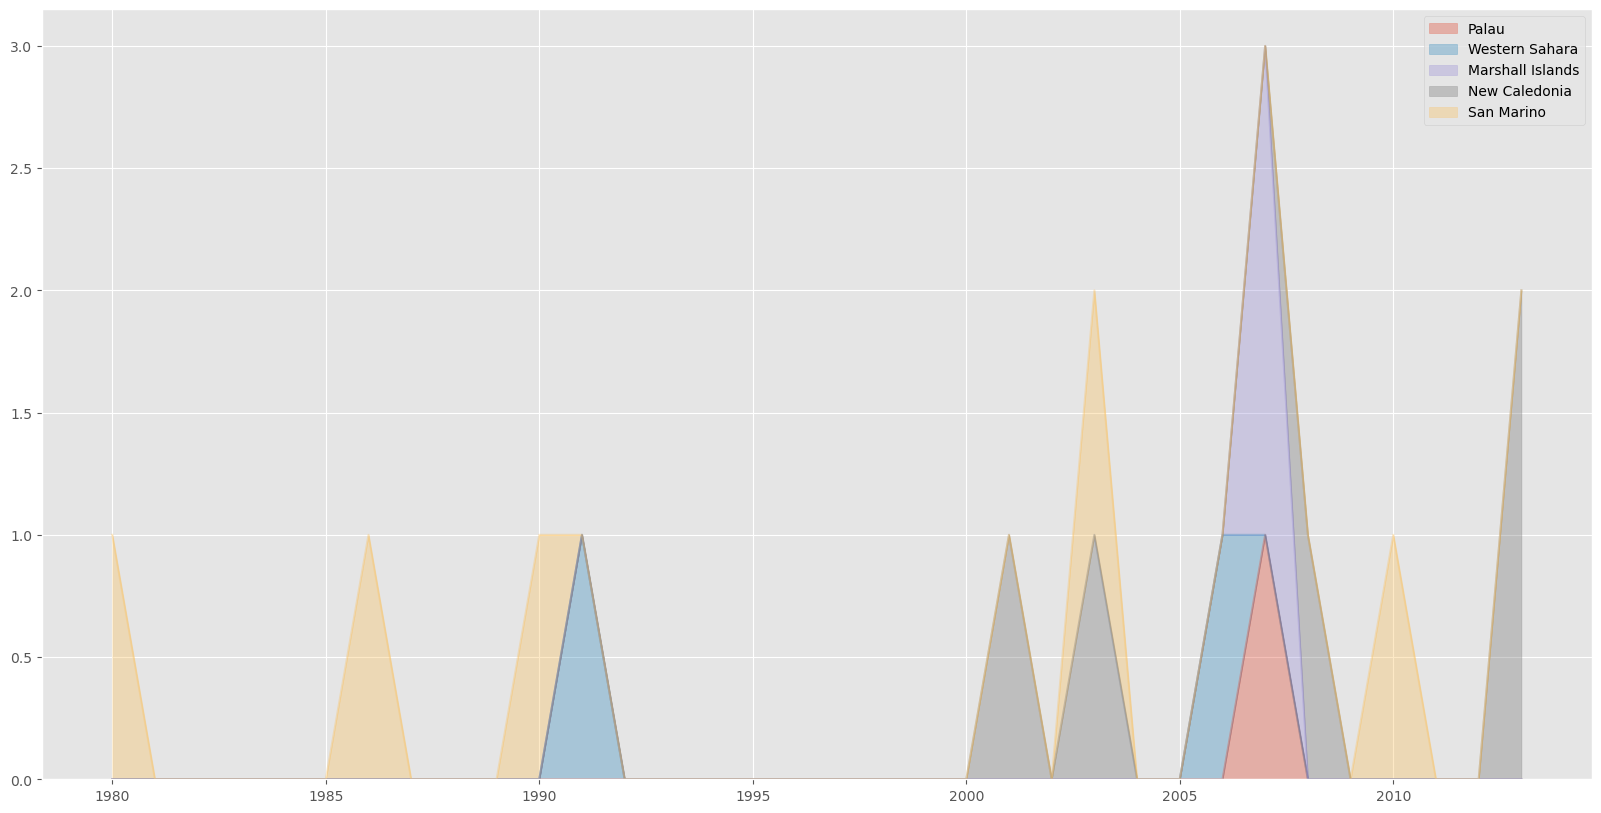

In [49]:
### type your answer here

ax = df_least5.plot(kind='area', alpha=0.35, figsize=(20, 10))




# Histograms<a id="8"></a>

A histogram is a way of representing the _frequency_ distribution of numeric dataset. The way it works is it partitions the x-axis into _bins_, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:


In [50]:
# let's quickly view the 2013 data
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [51]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

-   178 countries contributed between 0 to 3412.9 immigrants 
-   11 countries contributed between 3412.9 to 6825.8 immigrants
-   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>


We can easily graph this distribution by passing `kind=hist` to `plot()`.


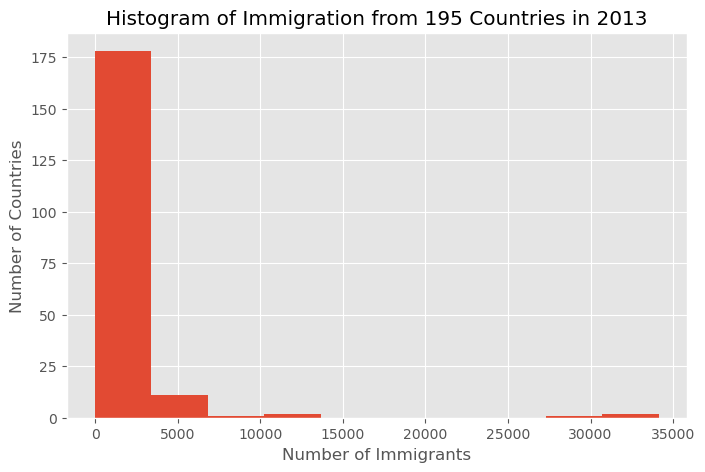

In [52]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population. 

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


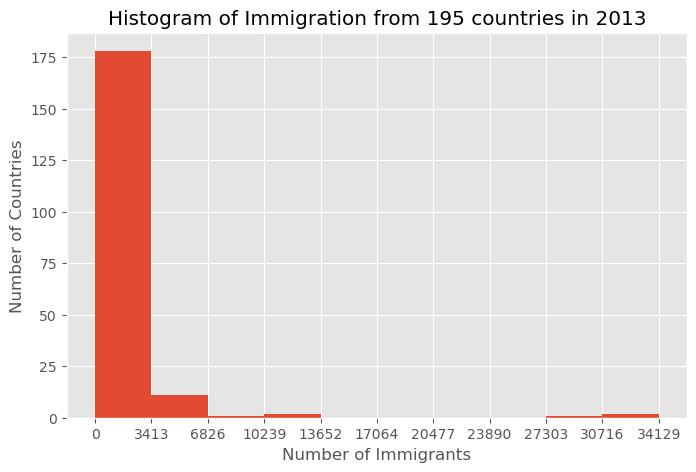

In [53]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

_Side Note:_ We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same. 

See the _pandas_ documentation for more info  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [54]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden','Finland'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
Finland,208,205,170,70,83,69,68,92,89,78,...,54,67,51,62,89,63,63,72,62,76


<Axes: ylabel='Frequency'>

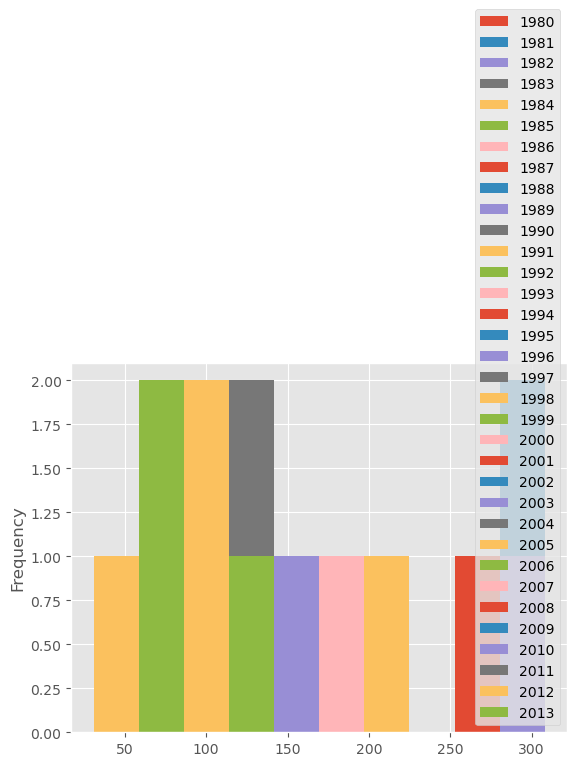

In [55]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

That does not look right! 

Don't worry, you'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, _pandas_ instead plotted the population frequency distribution for the `years`.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.


In [56]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden','Finland'], years].transpose()
df_t.head()

,Denmark,Norway,Sweden,Finland
1980,272,116,281,208
1981,293,77,308,205
1982,299,106,222,170
1983,106,51,176,70
1984,93,31,128,83


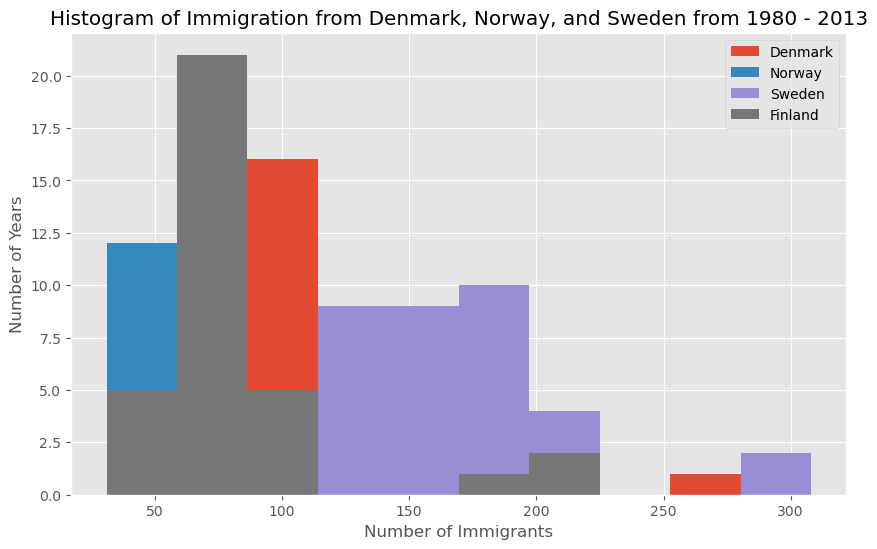

In [57]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

-   increase the bin size to 15 by passing in `bins` parameter
-   set transparency to 60% by passing in `alpha` paramemter
-   label the x-axis by passing in `x-label` paramater
-   change the colors of the plots by passing in `color` parameter


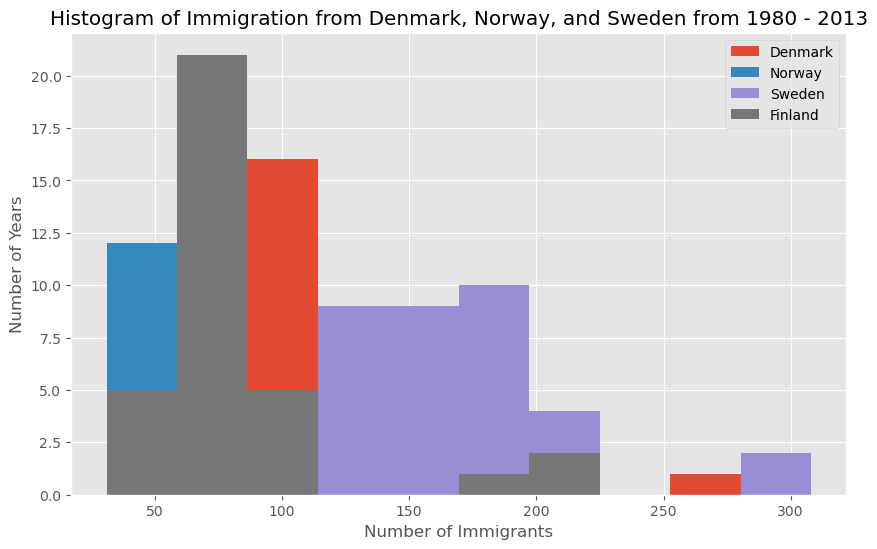

In [58]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

-   increase the bin size to 15 by passing in `bins` parameter
-   set transparency to 60% by passing in `alpha` paramemter
-   label the x-axis by passing in `x-label` paramater
-   change the colors of the plots by passing in `color` parameter


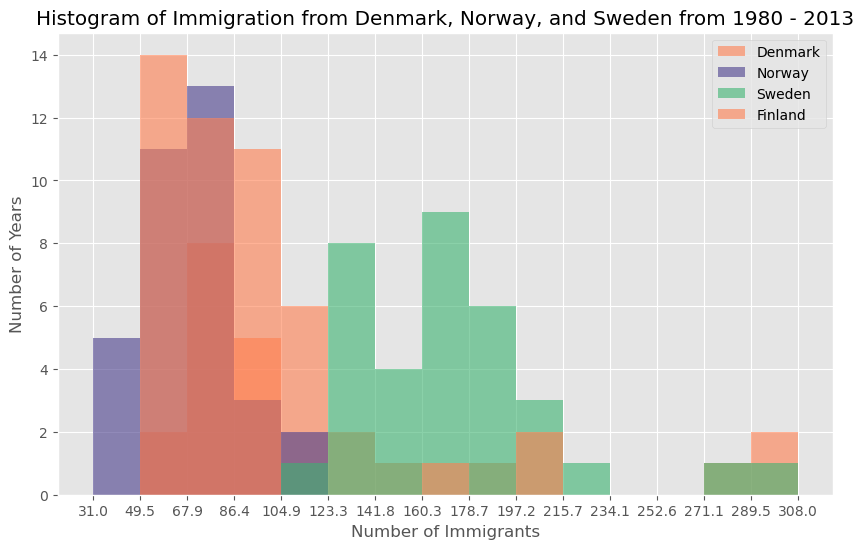

In [59]:
import numpy as np
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


If we do no want the plots to overlap each other, we can stack them using the `stacked` paramemter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


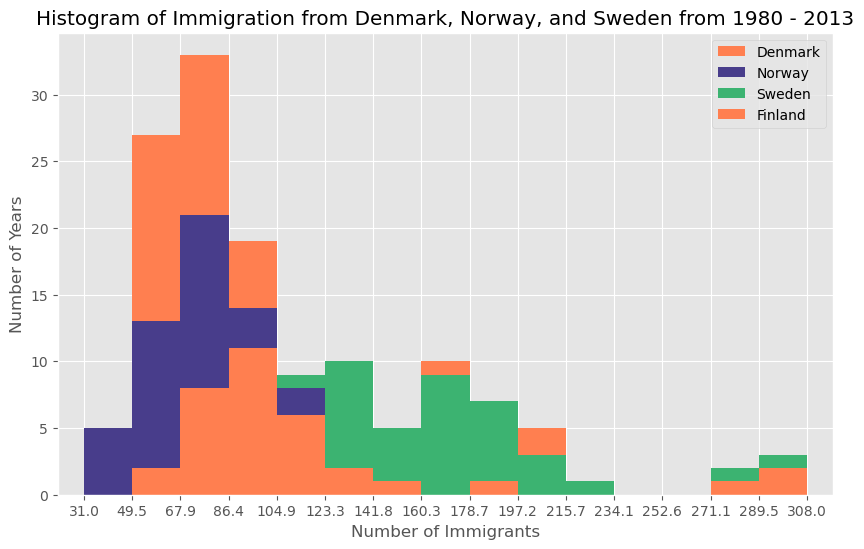

In [60]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.


<Axes: ylabel='Frequency'>

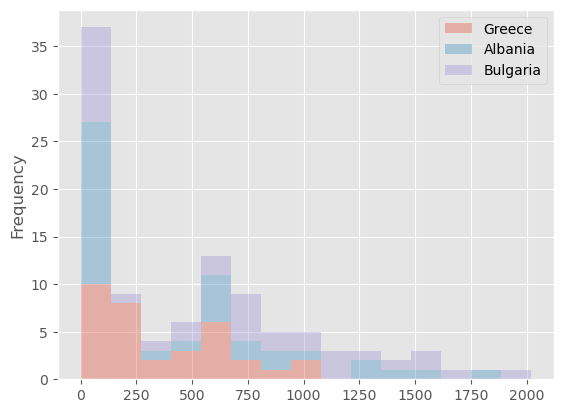

In [61]:
### type your answer here
df_three_con=df_can.loc[['Greece','Albania','Bulgaria'],years]
df_three_con=df_three_con.transpose()
df_three_con.plot(kind='hist',bins=15,alpha=0.35,stacked=True)


# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the _length_ of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

-   `kind=bar` creates a _vertical_ bar plot
-   `kind=barh` creates a _horizontal_ bar plot


**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particuarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar. 

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 


In [62]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

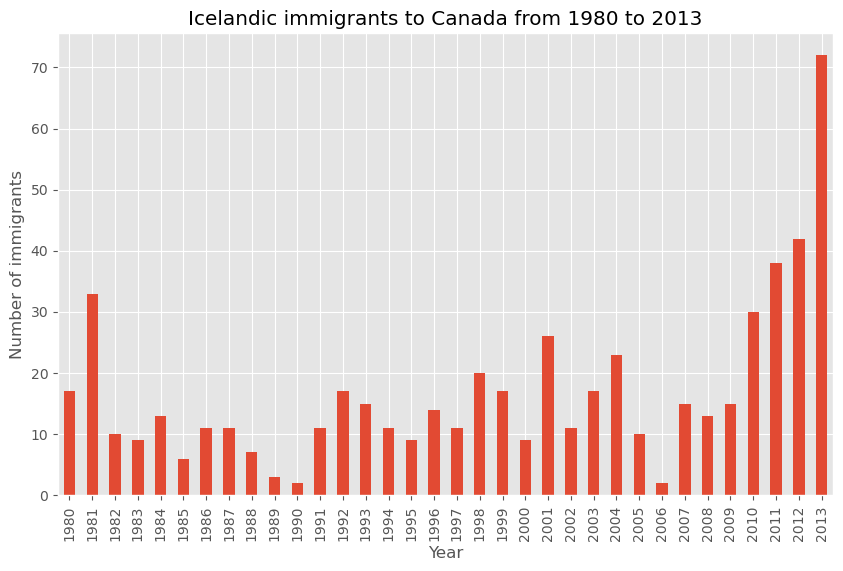

In [63]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

-   `s`: str, the text of annotation.
-   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
-   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
-   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
-   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    -   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    -   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    -   `color`: Specifes color of arror.
    -   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations: 
[http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


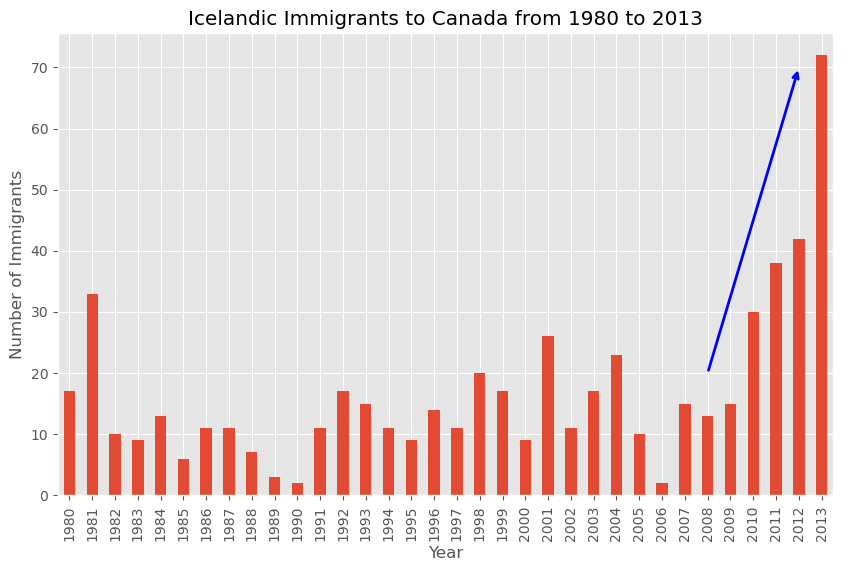

In [64]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

-   `rotation`: rotation angle of text in degrees (counter clockwise)
-   `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]


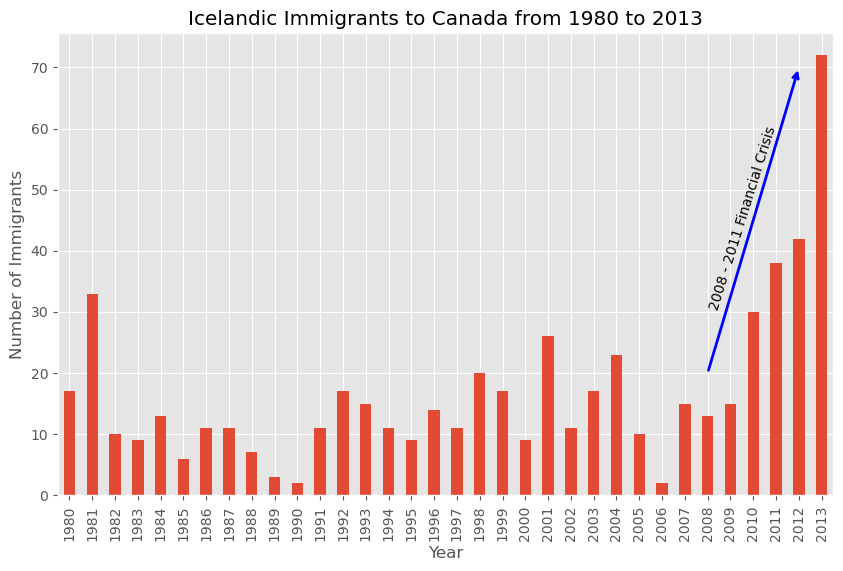

In [65]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categetorical variables.

**Question:** Using the scripting layter and the `df_can` dataset, create a _horizontal_ bar plot showing the _total_ number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


Step 1: Get the data pertaining to the top 15 countries.


<Axes: >

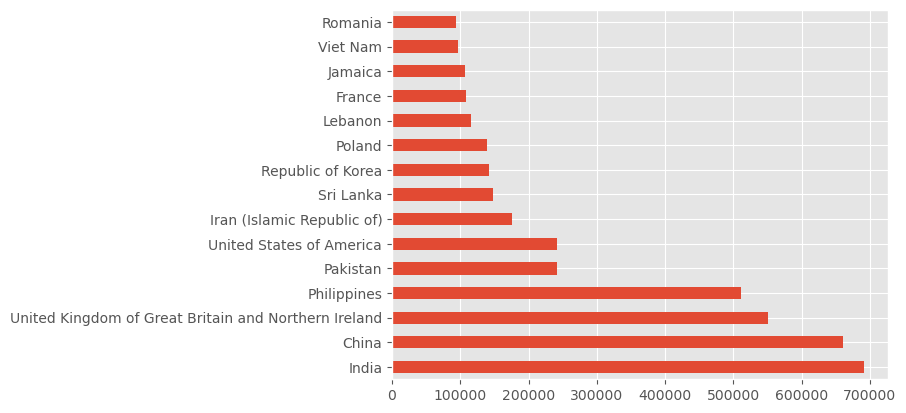

In [66]:
### type your answer
df_can.sort_values(['Total'], ascending=False, axis=0,inplace=True)
df_can_top15=df_can['Total'].head(15)
df_can_top15.plot(kind='barh')

Step 2: Plot data:

1.  Use `kind='barh'` to generate a bar chart with horizontal bars.
2.  Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3.  Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.


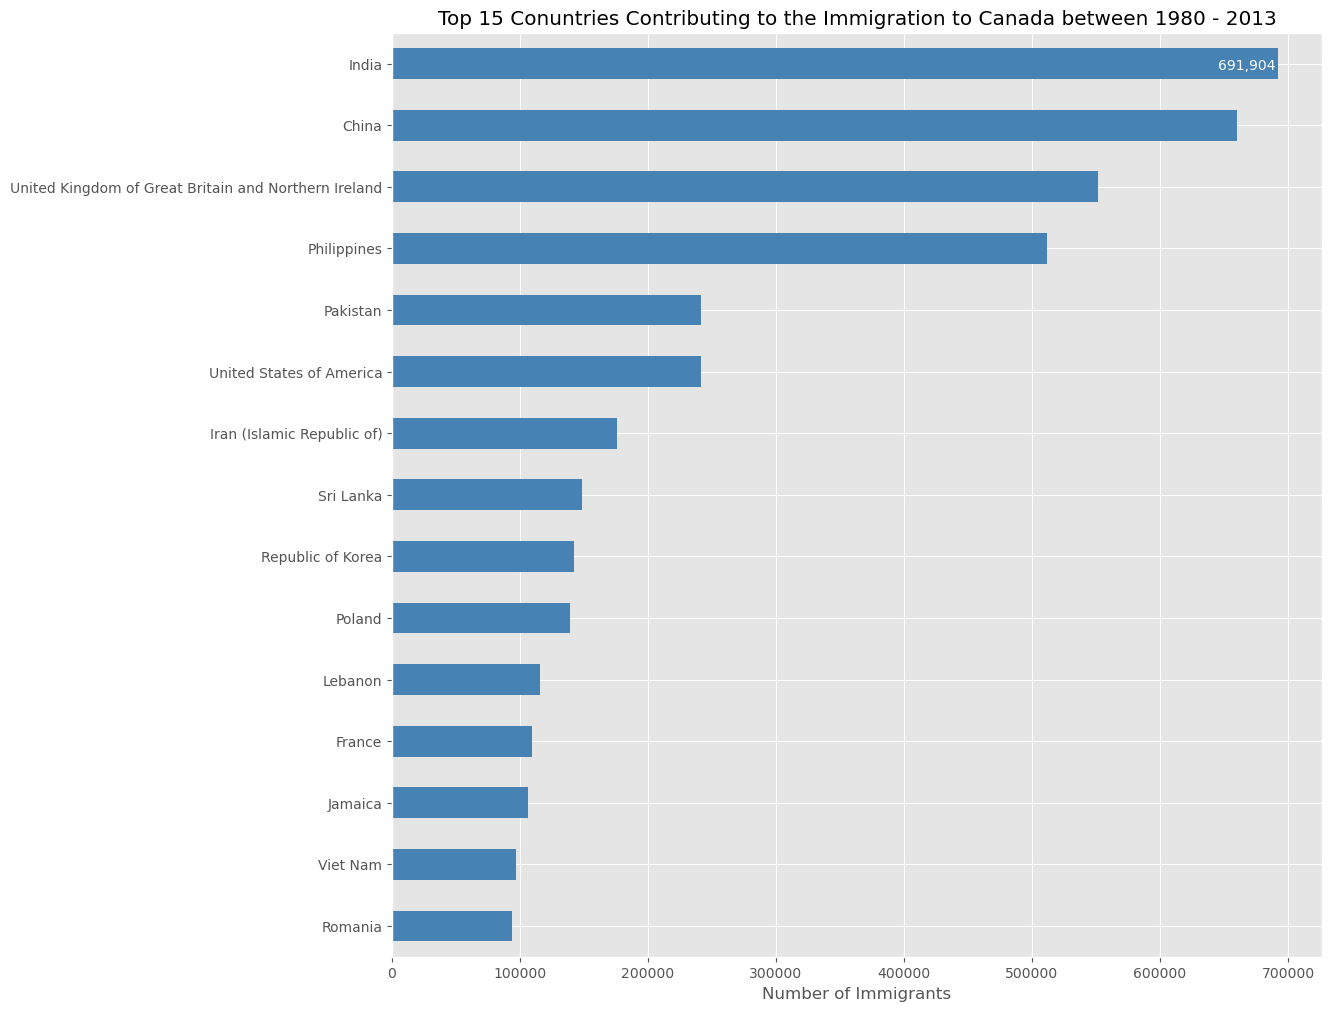

In [67]:
### type your answer here
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()


# Pie Charts <a id="6"></a>

A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013. 


Step 1: Gather data. 

We will use _pandas_ `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [68]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaMiddle AfricaWeste...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaEastern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeWe...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

-   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
-   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
-   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


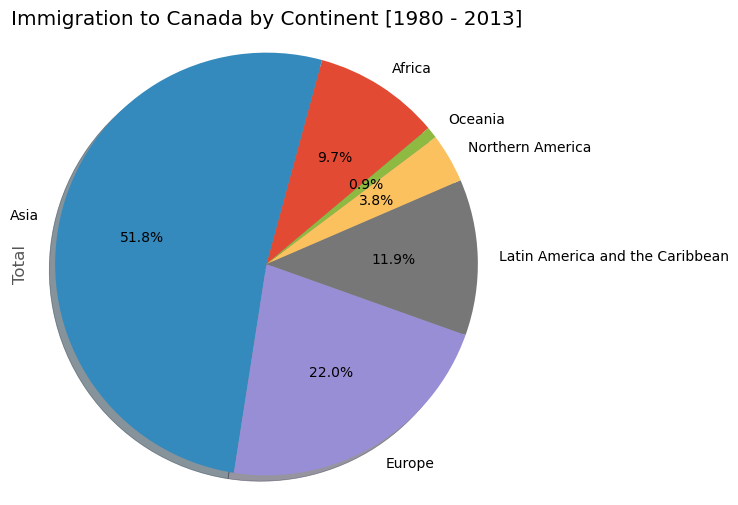

In [69]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(6, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=40,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

-   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
-   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
-   Pass in a custom set of colors for continents by passing in `colors` parameter.
-   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.


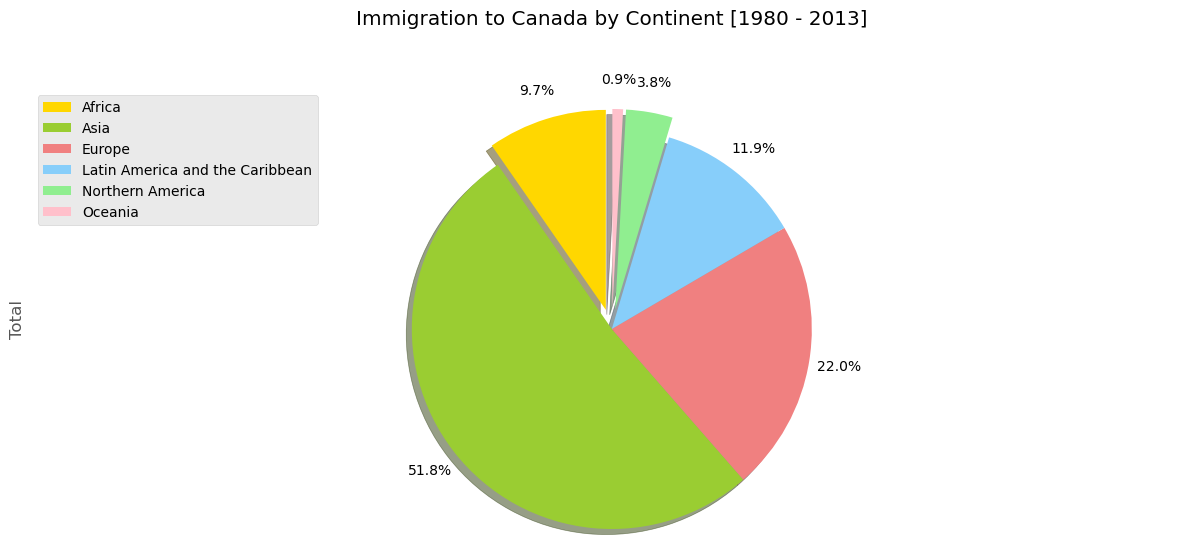

In [70]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.


<Axes: ylabel='2013'>

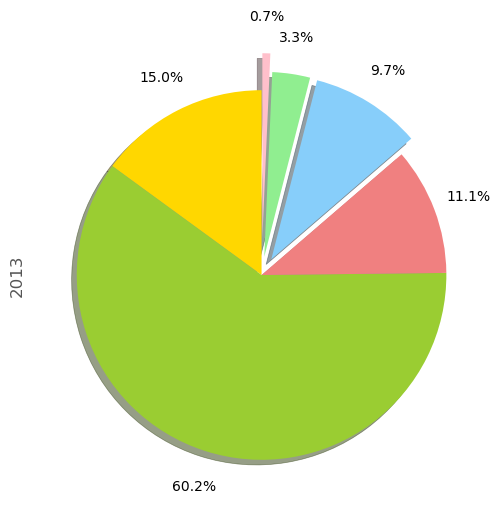

In [72]:
### type your answer here
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.2,            # the ratio between the pie center and start of text label
                            colors=colors_list,
                            explode=explode_list         # 'explode' lowest 3 continents
                            )


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

    df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
    plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
    plt.axis('equal') 

    # add legend
    plt.legend(labels=df_continents.index, loc='upper left') 

    # show plot
    plt.show()

```

</details>


# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the _distribution_ of the data through five main dimensions: 

-   **Minimun:** Smallest number in the dataset.
-   **First quartile:** Middle number between the `minimum` and the `median`.
-   **Second quartile (Median):** Middle number of the (sorted) dataset.
-   **Third quartile:** Middle number between `median` and `maximum`.
-   **Maximum:** Highest number in the dataset.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">


To make a `box plot`, we can use `kind=box` in `plot` method invoked on a _pandas_ series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [73]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [74]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyize these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.


Step 1: Get the dataset for China and India and call the dataframe **df_CI**.


In [75]:
### type your answer here
df_CI=df_can.loc[['India','China'],years].transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


Let's view the percentages associated with both countries using the `describe()` method.


In [76]:
### type your answer here

df_CI.describe()

,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


Step 2: Plot data.


<Axes: >

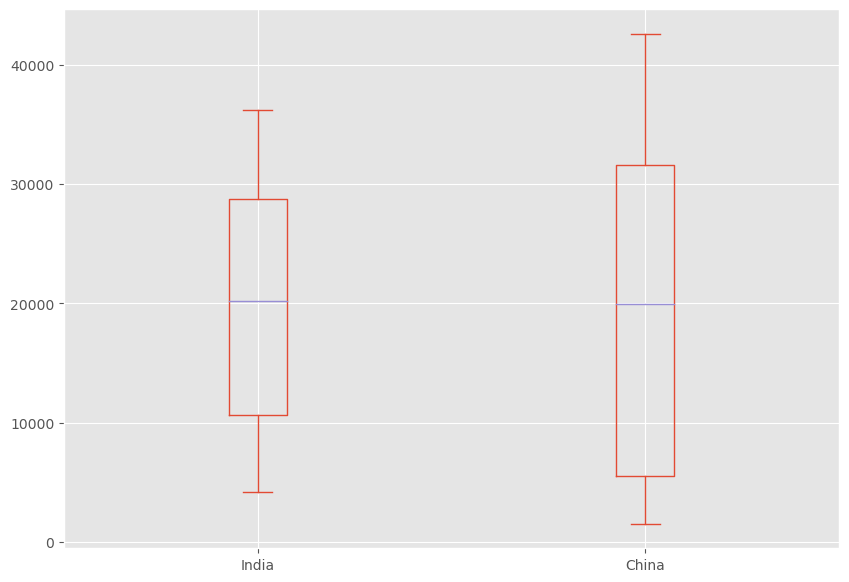

In [77]:
### type your answer here

df_CI.plot(kind='box',figsize=(10,7))



We can observe that, while both countries have around the same median immigrant population (~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to _False_. You can also specify a different color in case you are not a big fan of the default red color.


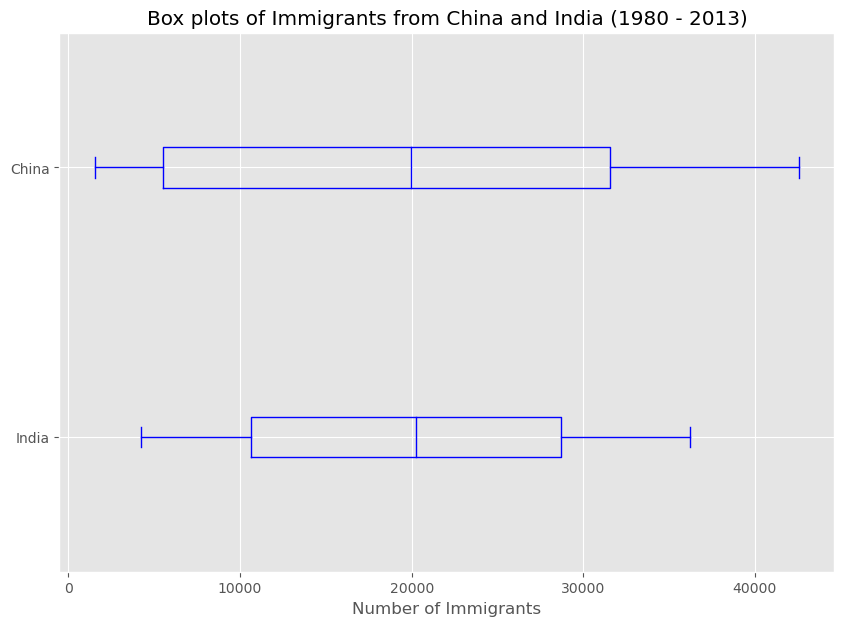

In [78]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

-   `nrows` and `ncols` are used to notionally split the figure into (`nrows` * `ncols`) sub-axes,  
-   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">


We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


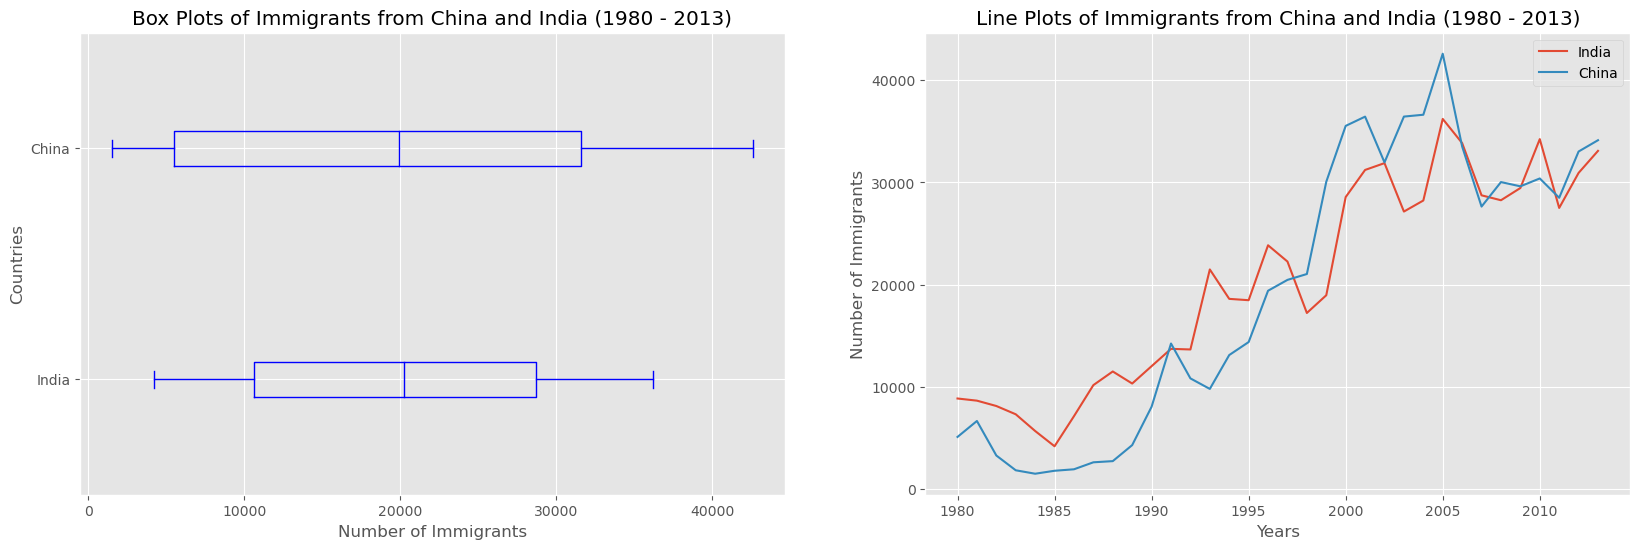

In [79]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

** * Tip regarding subplot convention **

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that the a 3 digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


Let's try something a little more advanced. 

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the _decades_ `1980s`, `1990s`, and `2000s`.


Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.


In [80]:
### type your answer here
df_can.sort_values(by='Total',inplace=True, ascending=False,axis=0)
df_top15=df_can[years].head(15)
df_top15.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.


In [81]:
### type your answer here
df_80=df_top15.iloc[:,0:10].sum(axis=1)
df_90=df_top15.iloc[:,10:20].sum(axis=1)
df_00=df_top15.iloc[:,20:].sum(axis=1)

new_df=pd.DataFrame({'1980s': df_80, '1990s': df_90, '2000s':df_00}) 
new_df.head()

,1980s,1990s,2000s
India,82154,180395,429355
China,32003,161528,466431
United Kingdom of Great Britain and Northern Ireland,179171,261966,110363
Philippines,60764,138482,312145
Pakistan,10591,65302,165707


Let's learn more about the statistics associated with the dataframe using the `describe()` method.


In [82]:
### type your answer here
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,138333.266667
std,44190.676455,68237.560246,145288.871956
min,7613.000000,30028.000000,16775.000000
25%,16698.000000,39259.000000,46754.500000
50%,30638.000000,56915.000000,88133.000000
75%,59183.000000,104451.500000,138035.000000
max,179171.000000,261966.000000,466431.000000


Step 3: Plot the box plots.


<Axes: >

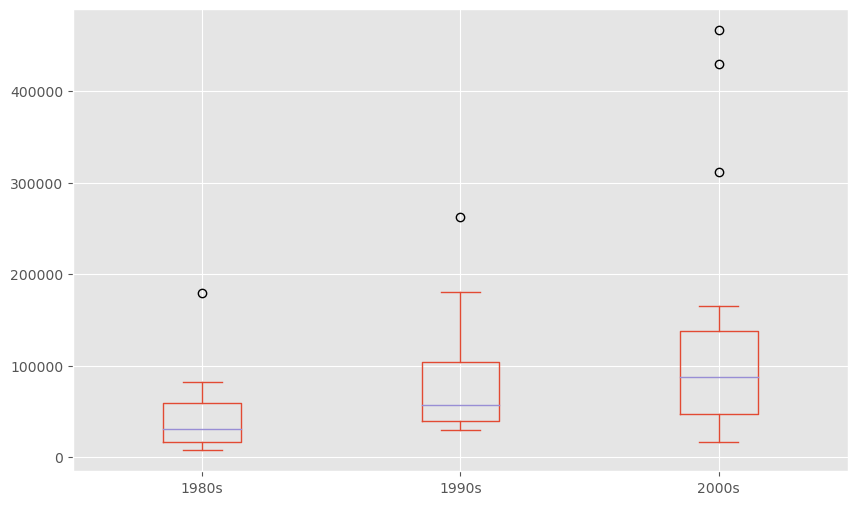

In [83]:
### type your answer here

new_df.plot(kind='box',figsize=(10, 6))


Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

-   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
-   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

-   Q1 (25%) = 36,101.5 <br>
-   Q3 (75%) = 105,505.5 <br>
-   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5


In [84]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']>209611]

,1980s,1990s,2000s
India,82154,180395,429355
China,32003,161528,466431
Philippines,60764,138482,312145


China and India are both considered as outliers since their population for the decade exceeds 209,611.5. 

The box plot is an advanced visualizaiton tool, and there are many options and customizations that exceed the scope of this lab. Please refer to [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) on box plots for more information.


# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.


In [85]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.


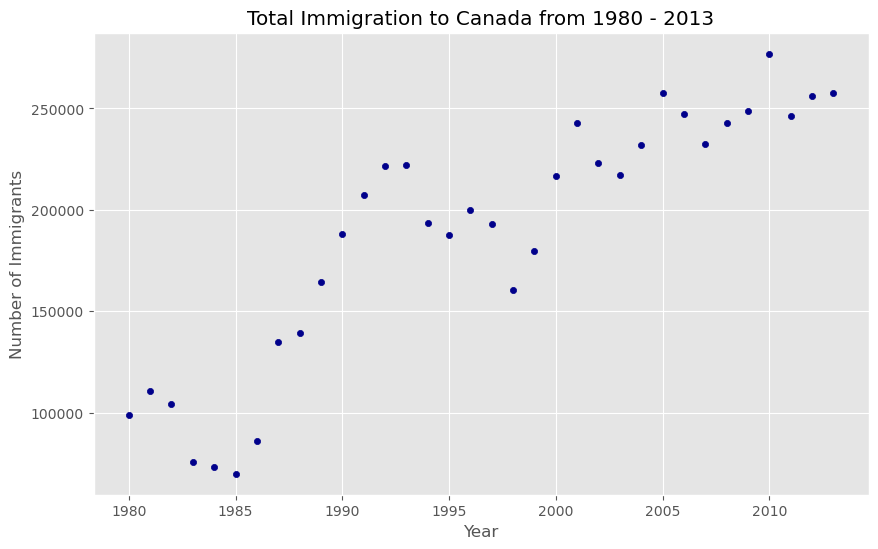

In [86]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit). 


So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

-   `x`: x-coordinates of the data. 
-   `y`: y-coordinates of the data. 
-   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [87]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1. 

Step 2: Plot the regression line on the `scatter plot`.


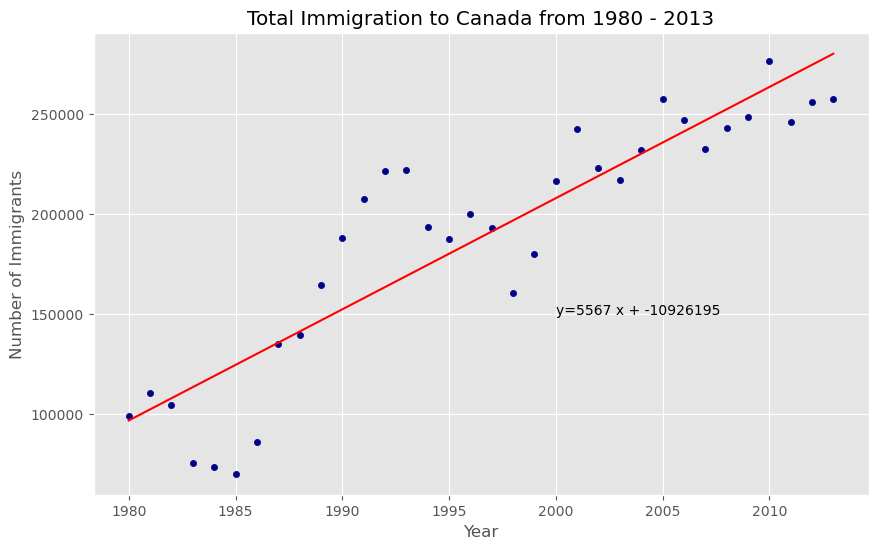

'No. Immigrants = 5567 * Year + -10926195'

In [88]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.


Step 1: Get the data:

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.


In [89]:
### type your answer here
df_countries=df_can.loc[['Denmark','Norway','Sweden'],years]
df_total=pd.DataFrame(df_countries.sum(axis=0))
df_total.head()
df_total.reset_index(inplace=True)
df_total.columns = ['year','total']
df_total['year'] = df_total['year'].astype(int)


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.


<Axes: xlabel='year', ylabel='total'>

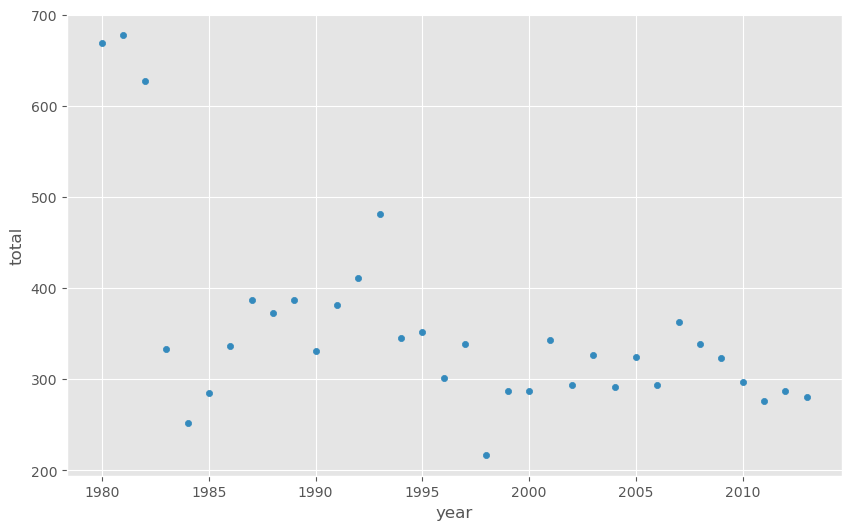

In [90]:
### type your answer here

df_total.plot(kind='scatter',x='year',y='total',figsize=(10, 6))



# Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the _normalized_ value of the population for each year.


Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and bring it in the dataframe.


In [91]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) to bring all values into the range [0,1]. The general formula is:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

where _`X`_ is an original value, _`X'`_ is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.


In [92]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Step 3: Plot the data. 

-   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
-   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    -   multiply weights by 2000 to scale it up on the graph, and,
    -   add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).


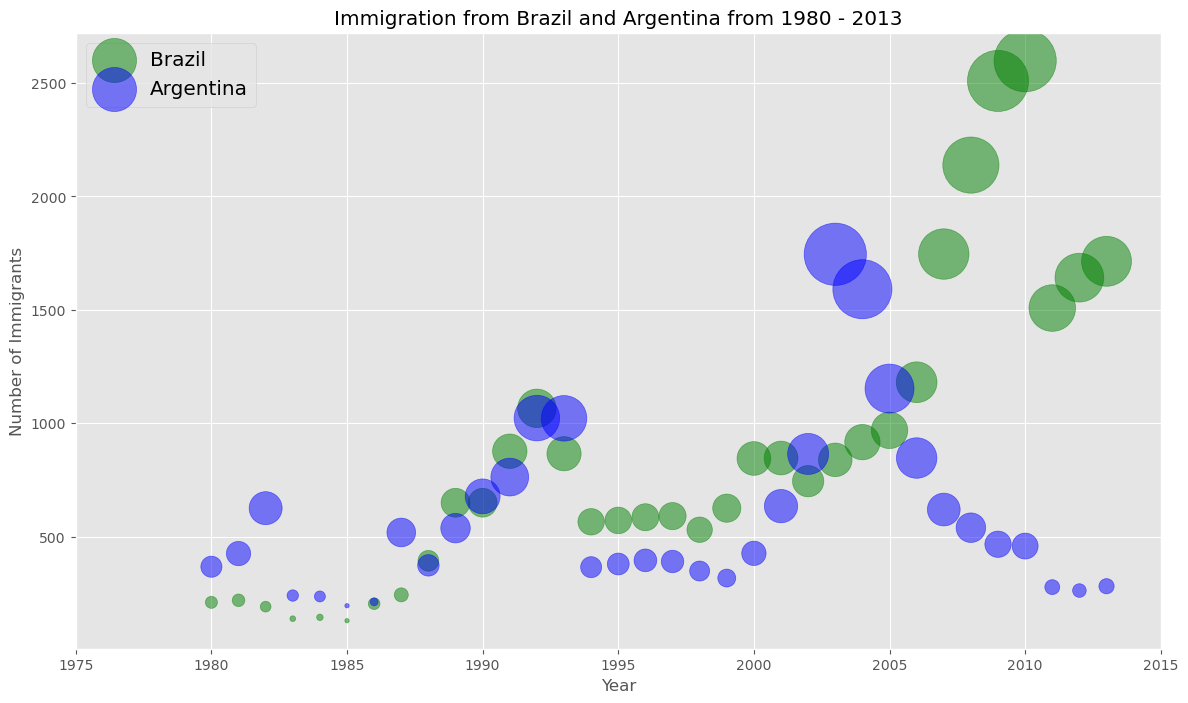

In [93]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression. 

On a similar note, Brazil suffered the _Samba Effect_ where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.


**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.


Step 1: Normalize the data pertaining to China and India.


In [94]:
### type your answer here

india_normalized=(df_can_t['India']-df_can_t['India'].min())/(df_can_t['India'].max()-df_can_t['India'].min())
china_normalized=(df_can_t['China']-df_can_t['China'].min())/(df_can_t['China'].max()-df_can_t['China'].min())



Step 2: Generate the bubble plots.


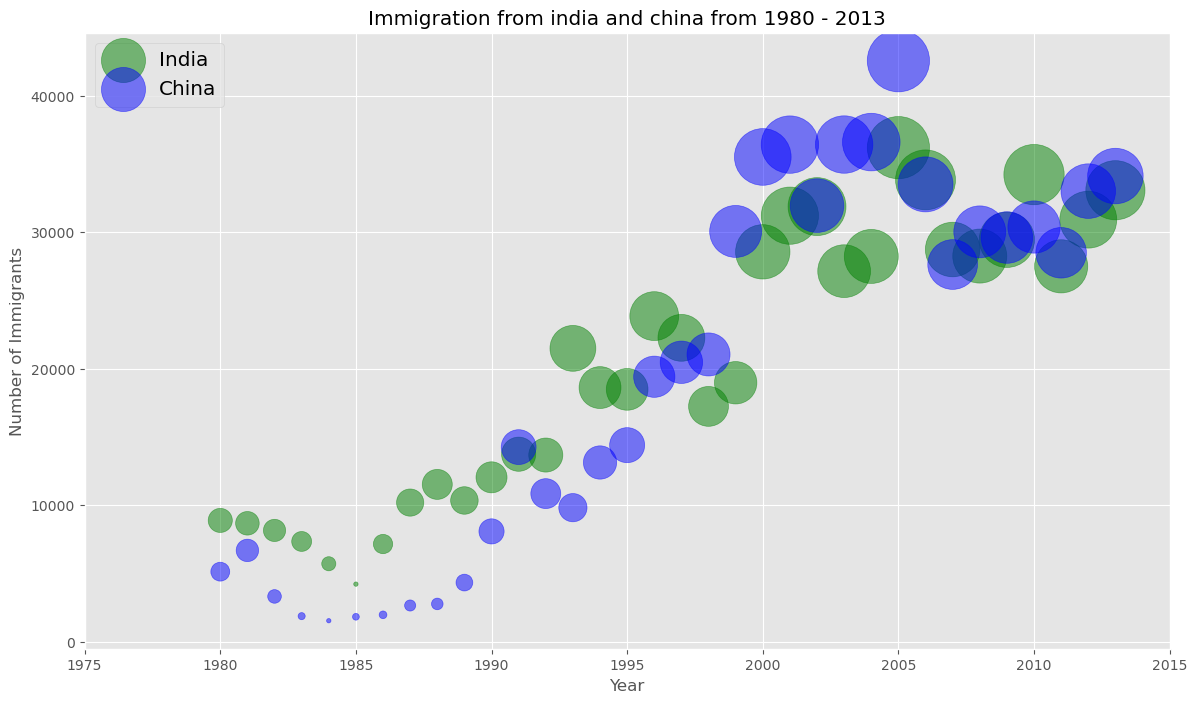

In [95]:
### type your answer here

ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=india_normalized * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    alpha=0.5,
                    color="blue",
                    s=china_normalized * 2000 + 10,
                    ax = ax0
                   )






ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from india and china from 1980 - 2013')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')

# Waffle Charts <a id="6"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


Let's revisit the previous case study about Denmark, Norway, and Sweden.


In [96]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [97]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [98]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [99]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [100]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1   
            print(tile_index)
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

1
130
207
Waffle chart populated!


Let's take a peek at how the matrix looks like.


In [101]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.


**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 640x480 with 0 Axes>

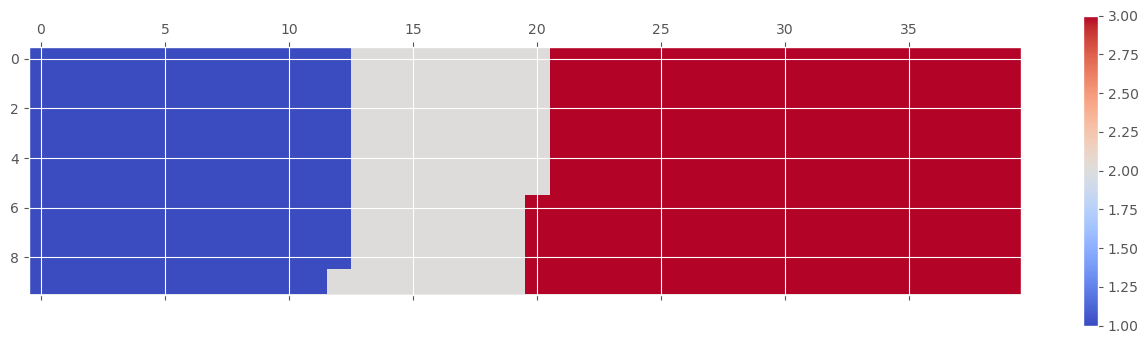

In [102]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# **Step 6.** Prettify the chart.


([], [])

<Figure size 640x480 with 0 Axes>

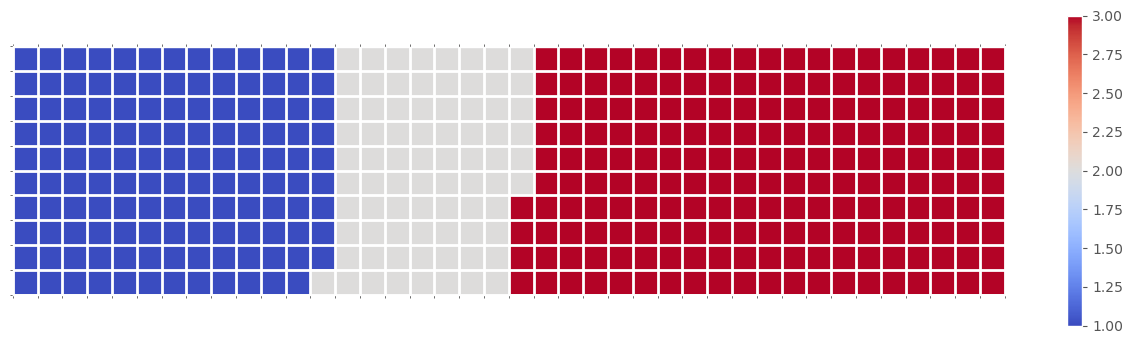

In [103]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7.** Create a legend and add it to chart.


<Figure size 640x480 with 0 Axes>

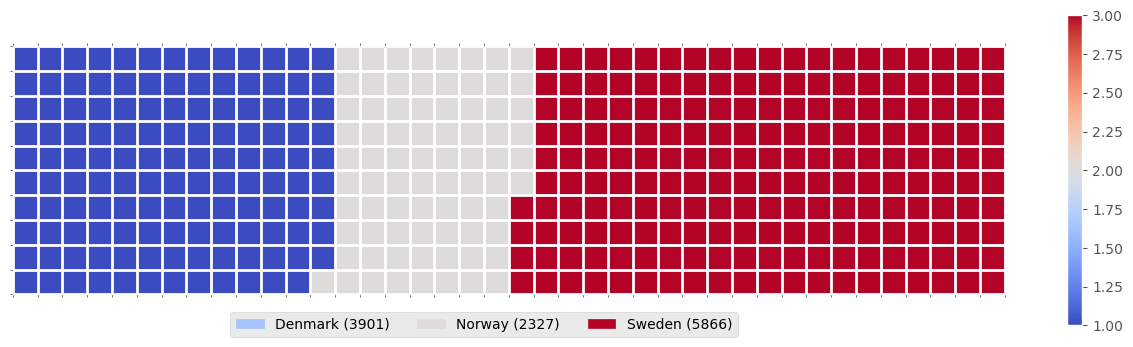

In [104]:
import matplotlib.patches as mpatches

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

And there you go! What a good looking _delicious_ `waffle` chart, don't you think?


Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called _create_waffle_chart_. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:


In [105]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

And now let's call our function to create a `waffle` chart.


In [106]:
create_waffle_chart(categories, values, height, width, colormap)

NameError: name 'create_waffle_chart' is not defined

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), but it looks like the repository is still being built. 


# Word Clouds <a id="8"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.


First, let's install the package.


In [107]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 218.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/300.2 kB 255.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 262.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 285.2 kB/s eta 0:00:01
   ------------------ --------------

In [108]:

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled _Alice's Adventures in Wonderland_. Let's go ahead and download a _.txt_ file of the novel.


Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.


In [109]:
total_immigration = df_can['Total'].sum()
total_immigration
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.


In [110]:
# create the word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


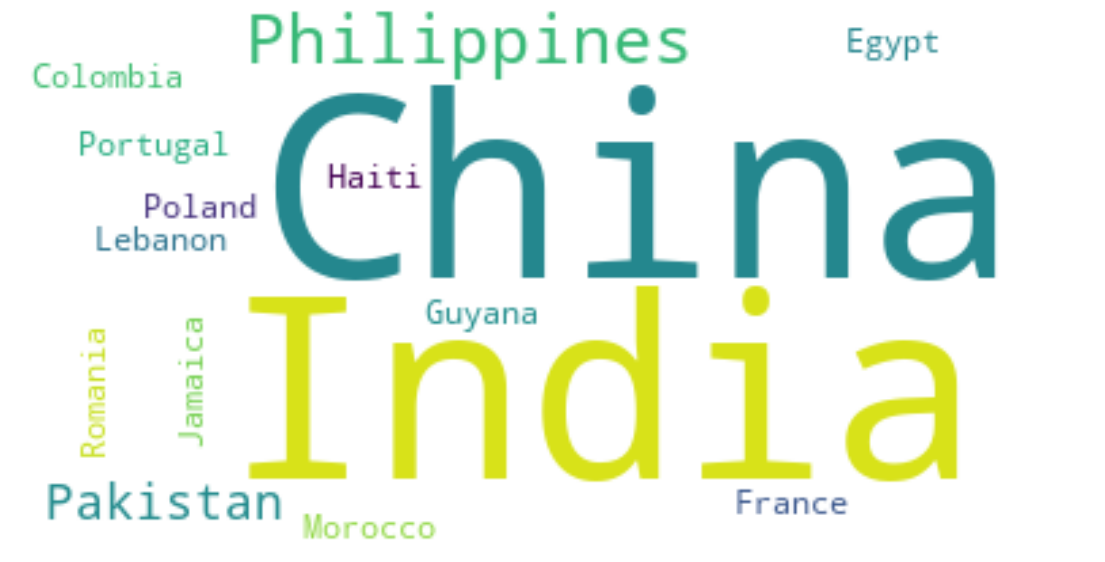

In [119]:
# Choropleth Maps <a id="8"></a>

#A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

#<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Images/2000_census_population_density_map_by_state.png" width = 600> 
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()